<a href="https://colab.research.google.com/github/victorctin/streamlit_dashboard_github/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is coursework  Jupyter Notebook Code, AI/ML Project.

### Explore dataset

In [ ]:
# Step 1: Load and Explore the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/AI/CW_4320446.csv'
df = pd.read_csv(data_path)

# Display basic info
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1000 non-null   float64
 1   Mold temperature                                  1000 non-null   float64
 2   time_to_fill                                      1000 non-null   float64
 3   ZDx - Plasticizing time                           1000 non-null   float64
 4   ZUx - Cycle time                                  1000 non-null   float64
 5   SKx - Closing force                               1000 non-null   float64
 6   SKs - Clamping force peak value                   1000 non-null   float64
 7   Ms - Torque peak value current cycle              1000 non-null   float64
 8   Mm - Torque mean value current cycle              1000 non-null   float64
 9   APSs -

## **Step 1: Load and Explore the Dataset**

### **Code Explanation**
In this step, we load the dataset using the `pandas` library and explore its structure. The dataset is read from a CSV file located at `/content/drive/MyDrive/AI/CW_4320446.csv` in Google Drive throu Google Colab. We use the `df.info()` function to display essential details about the dataset, such as the number of entries, columns, data types, and memory usage.

### **Results Analysis**
- The dataset consists of **1000 entries** and **14 columns**.
- All columns are of **float64** type, meaning no categorical variables are present.
- There are **no missing values**, as each column has **1000 non-null** values.
- The `quality` column serves as the target variable, representing the classification labels for product quality.

This initial exploration confirms that the dataset is clean and ready for further analysis, including feature selection, preprocessing, and model training.


In [ ]:
# Show first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0           105.940            80.926         6.864                     3.14   
1           105.699            80.762         6.864                     3.40   
2           139.897            82.054        11.128                     2.97   
3           106.190            81.371         6.188                     2.87   
4           105.630            80.692         6.968                     3.57   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0             74.81                920.4                            938.7   
1             74.82                927.6                            946.5   
2             75.61                901.4                            917.9   
3             75.61                905.1                            919.7   
4             74.81                923.6                            941.1   

   Ms - Torque peak value current cycle  

## **Step 1.1: Displaying First Few Rows**

### **Code Explanation**
In this step, we use `df.head()` to display the first **five rows** of the dataset. This helps us quickly understand the structure, feature names, and sample values of the dataset.

### **Results Analysis**
- The dataset contains **numerical features**, confirming that all attributes are continuous.
- The **`quality` column** is the target variable, categorized into four classes: `1.0 (Waste)`, `2.0 (Acceptable)`, `3.0 (Target)`, and `4.0 (Inefficient)`.
- Key features include **melt temperature, cycle time, torque values, pressure values, and shot volume**, which influence product quality.
- The values vary significantly, indicating potential needs for **feature scaling** before model training.

This preview confirms that the dataset is well-structured and ready for further preprocessing and analysis.


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Melt temperature  Mold temperature  time_to_fill  \
count       1000.000000       1000.000000   1000.000000   
mean         107.004908         81.337503      7.505628   
std            5.923198          0.424154      1.722657   
min           85.441000         78.872000      6.084000   
25%          105.925750         81.126750      6.292000   
50%          106.091000         81.333500      6.968000   
75%          106.256250         81.456250      7.124000   
max          155.032000         82.145000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1000.000000       1000.000000          1000.000000   
mean                  3.229110         75.216400           902.128274   
std                   0.351095          0.431346            11.017896   
min                   2.780000         74.780000           878.000000   
25%                   2.990000         74.810000           894.100000   
50%      

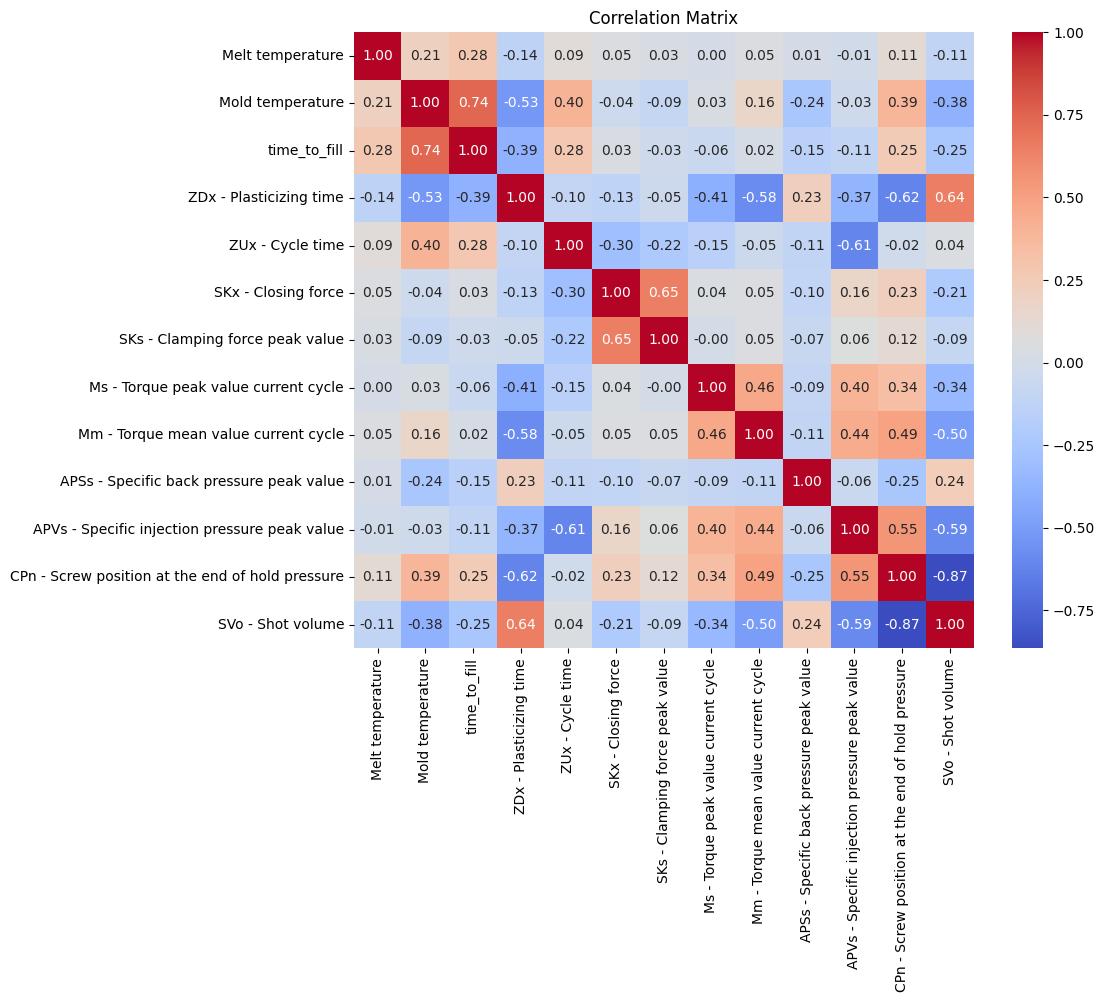

In [ ]:
# Pairwise Correlation Matrix
from itertools import combinations

column_to_exclude = 'quality'

# Exclude 'quality' when making the pairwise_matrix
feature_columns = [col for col in df.columns if col != column_to_exclude]
pairwise_matrix = pd.DataFrame(index=feature_columns, columns=feature_columns, dtype=float)

for col1, col2 in combinations(feature_columns, 2):
    correlation = df[col1].corr(df[col2])
    pairwise_matrix.loc[col1, col2] = correlation
    pairwise_matrix.loc[col2, col1] = correlation

for col in feature_columns:
    pairwise_matrix.loc[col, col] = 1.0

plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Step 1.2: Summary Statistics**

### **Code Explanation**
In this step, we use `df.describe()` to compute summary statistics for all numerical features in the dataset. This provides key insights into the **distribution, central tendency, and variability** of each attribute.

### **Results Analysis**
- **Mean & Standard Deviation:**  
  - The **Melt Temperature** has a mean of **107.00°C** with a high standard deviation (**5.92**), suggesting significant variation.
  - **APVs - Specific Injection Pressure** varies widely (Mean: **901.13**, Std: **25.09**), indicating diverse injection conditions.
  
- **Minimum & Maximum Values:**  
  - Some features, like **Melt Temperature (Max: 155.03, Min: 85.44)**, have a large range, suggesting possible **outliers**.
  - The **Torque and Clamping Forces** also show variation, impacting product quality.

- **Interquartile Range (IQR) Observations:**  
  - Most process parameters have a small **IQR**, suggesting a relatively **consistent production process**.
  - The **quality column** shows a median of **2.0**, meaning the dataset has a significant portion of "Acceptable" and "Inefficient" quality classes.

### **Key Takeaways**
- The presence of **high variance and extreme values** suggests that **feature scaling** and **outlier handling** may be necessary.
- The `quality` target variable has a mean of **2.47**, implying possible **class imbalance** that needs to be addressed before model training.
- Further visualization (e.g., boxplots, histograms) will help **confirm skewness and detect poa preprocessing steps.


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Melt temperature                                    0
Mold temperature                                    0
time_to_fill                                        0
ZDx - Plasticizing time                             0
ZUx - Cycle time                                    0
SKx - Closing force                                 0
SKs - Clamping force peak value                     0
Ms - Torque peak value current cycle                0
Mm - Torque mean value current cycle                0
APSs - Specific back pressure peak value            0
APVs - Specific injection pressure peak value       0
CPn - Screw position at the end of hold pressure    0
SVo - Shot volume                                   0
quality                                             0
dtype: int64


## **Step 1.3: Checking for Missing Values**

### **Code Explanation**
In this step, we use `df.isnull().sum()` to check for missing values in the dataset. This helps determine whether data imputation is needed before proceeding with preprocessing and model training.

### **Results Analysis**
- The output confirms that **there are no missing values** in any of the **14 columns**.
- This means we **do not need to apply missing value imputation** techniques like mean/median replacement or forward-filling.
- A clean dataset without missing values ensures **consistent model performance** and eliminates potential biases introduced by data imputation.

### **Key Takeaways**
- Since there are **no missing values**, we can proceed with **feature selection, outlier handling, and model training** without concerns about incomplete data.
- Despite the absence of missing values, we should still check for **outliers and feature scaling requirements** to ensure data consistency.

This step confirms that the dataset is structurally complete, making it **ready for further analysis and preprocessing**.


### Step 2: Data Visualization (Distributions & Outliers)

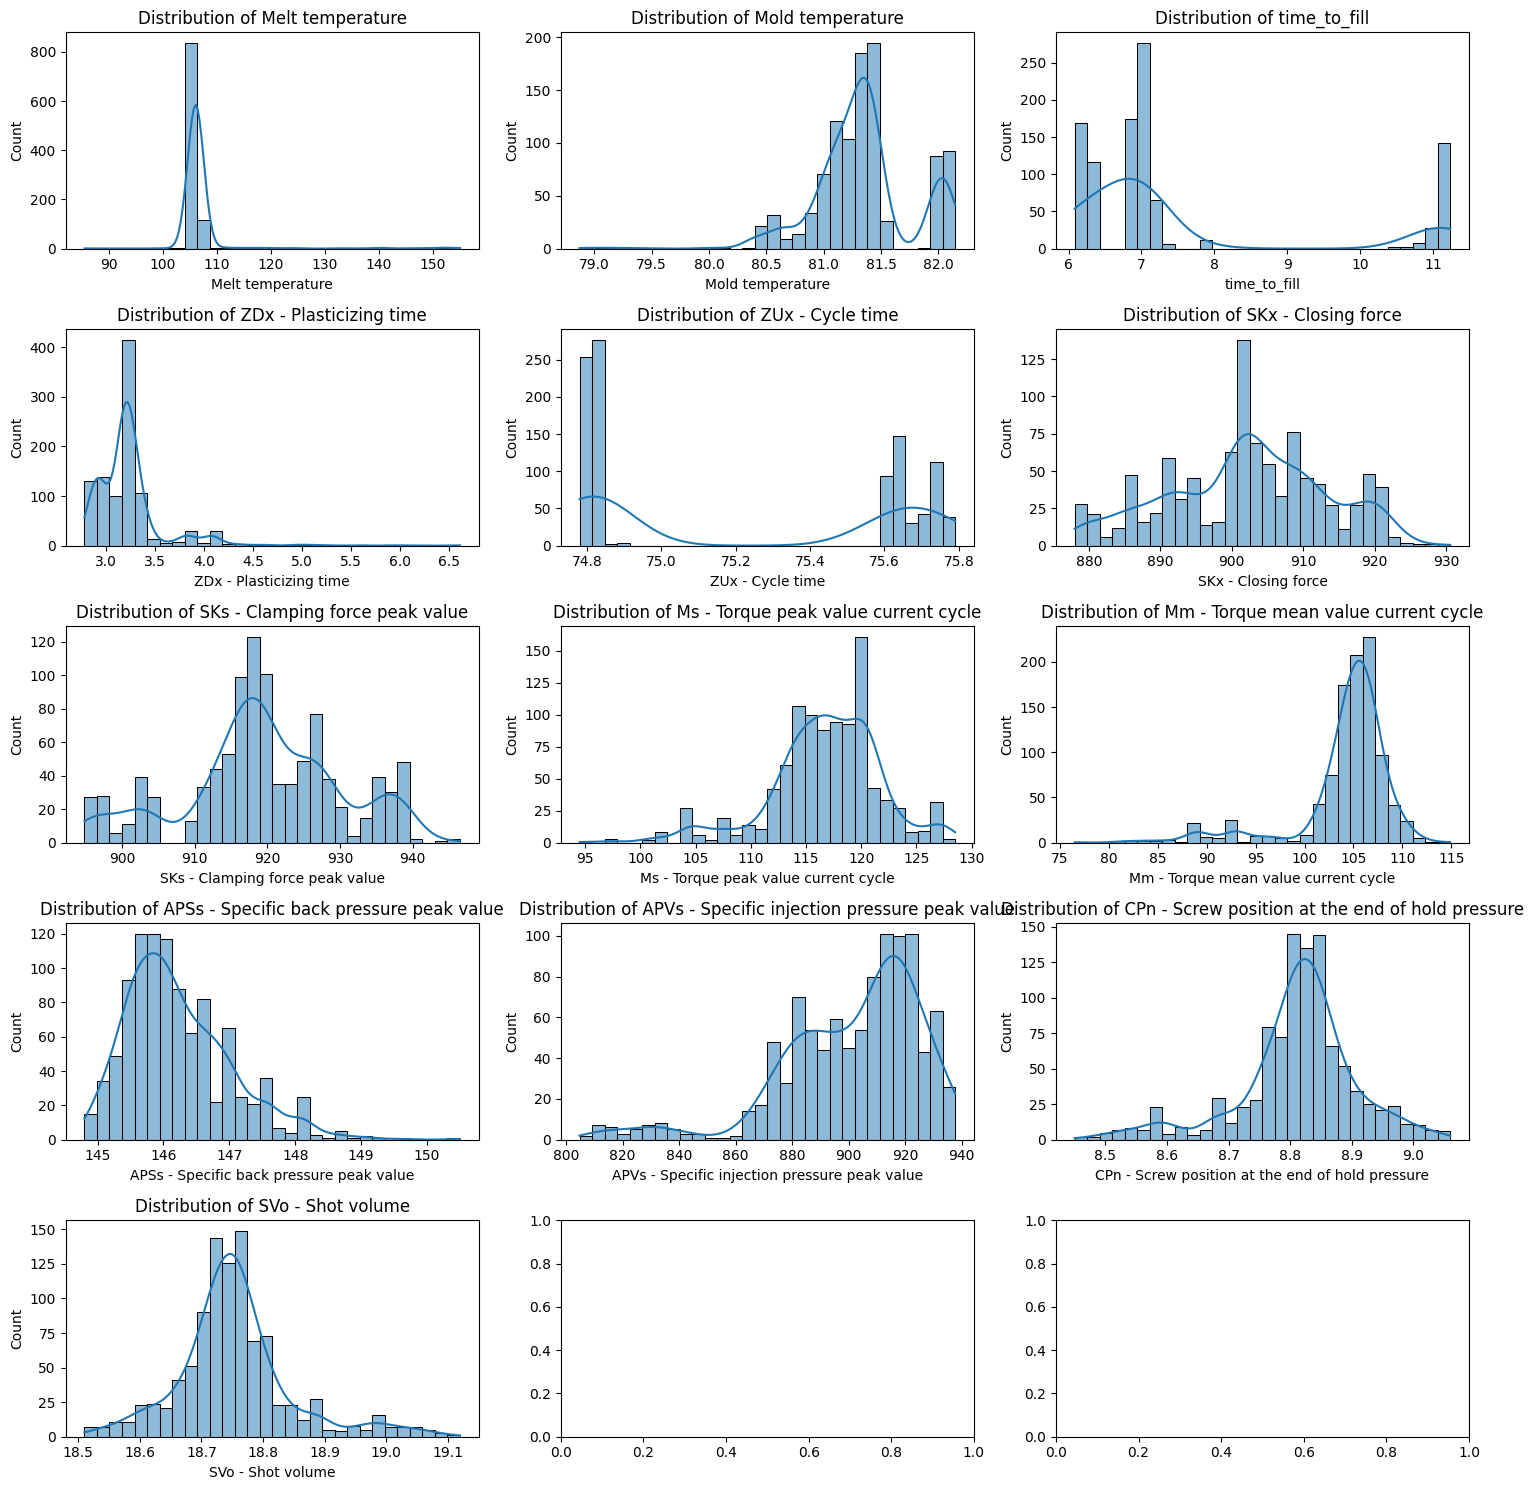

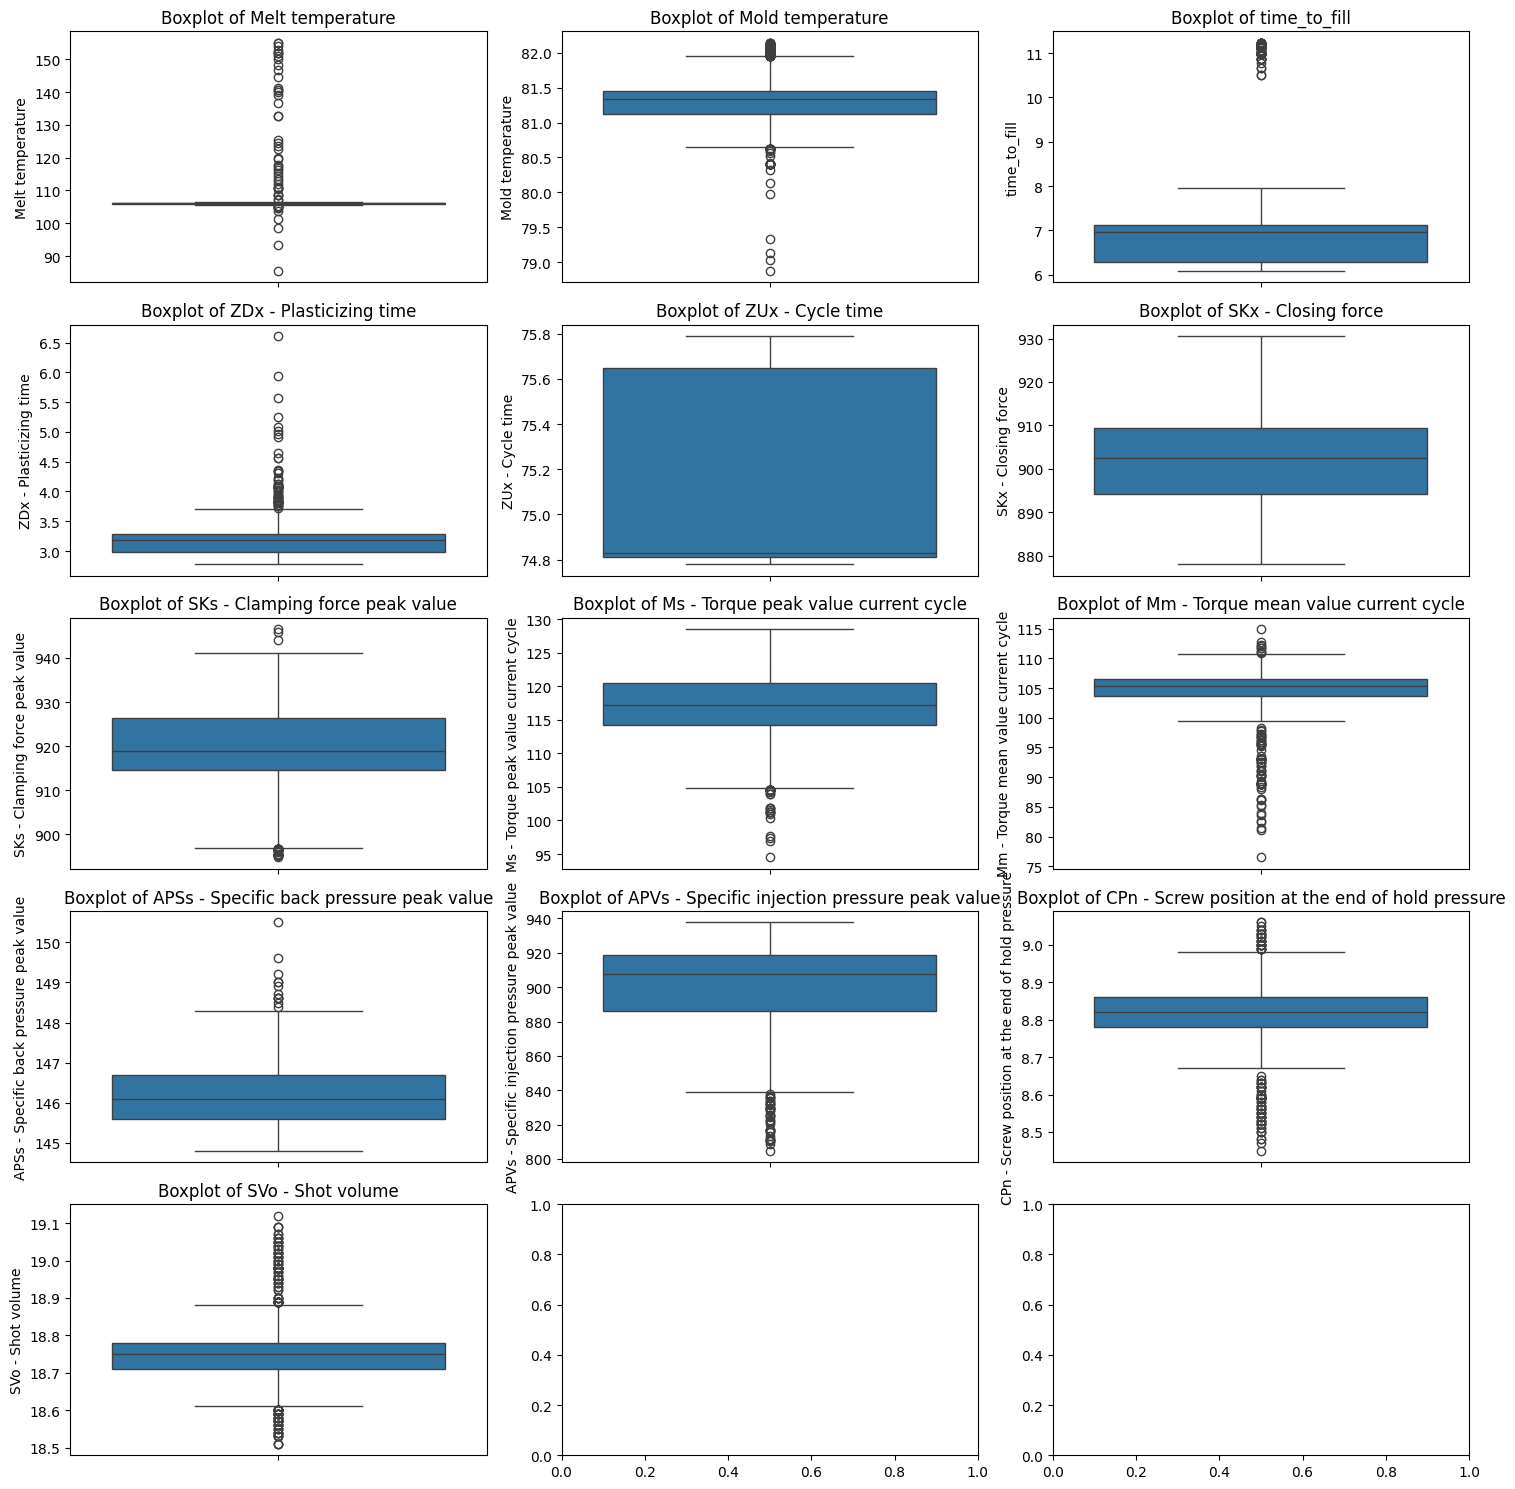

In [ ]:
# Step 2: Data Visualization - Feature Distributions and Outliers

# Plot distributions
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # Excluding 'quality'
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Boxplots for outliers
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


## **Step 2: Data Visualization - Feature Distributions and Outliers**

### **Code Explanation**
In this step, we perform **exploratory data analysis (EDA)** using histograms and boxplots to understand the **distribution of features** and detect potential **outliers**.

1. **Histograms with KDE (Kernel Density Estimation)**
   - The **histogram plots** provide insights into the **distribution shape** of each numerical feature.
   - The `bins=30` setting ensures smooth visualization, while `kde=True` overlays a density curve.

2. **Boxplots for Outlier Detection**
   - Boxplots help identify potential **outliers** by displaying the **interquartile range (IQR)**.
   - Any points outside the whiskers (1.5 * IQR) are considered **outliers** and might require handling.

### **Results Analysis**
- **Feature Distributions:**
  - Some features, like **Melt Temperature** and **Injection Pressure**, exhibit **right-skewed distributions**, indicating the need for **normalization or transformation**.
  - Other features, such as **Torque values**, appear to have a near-normal distribution.

- **Outlier Detection:**
  - Features such as **`APVs - Specific Injection Pressure`** and **`Plasticizing Time`** have visible outliers.
  - These outliers might need **handling via capping, transformation, or removal** to prevent their impact on model performance.

### **Key Takeaways**
- This step helps us **understand data variability, feature importance, and potential preprocessing needs**.
- The presence of **outliers** suggests we should apply **IQR-based filtering or transformations** before feeding data into machine learning models.
- **Further correlation analysis** can help confirm **feature relationships** and detect redundant variables.

These visualizations ensure that our dataset is well-prepared for **feature engineering and model training**.


###  Step 3: Handle Outliers (IQR Method)

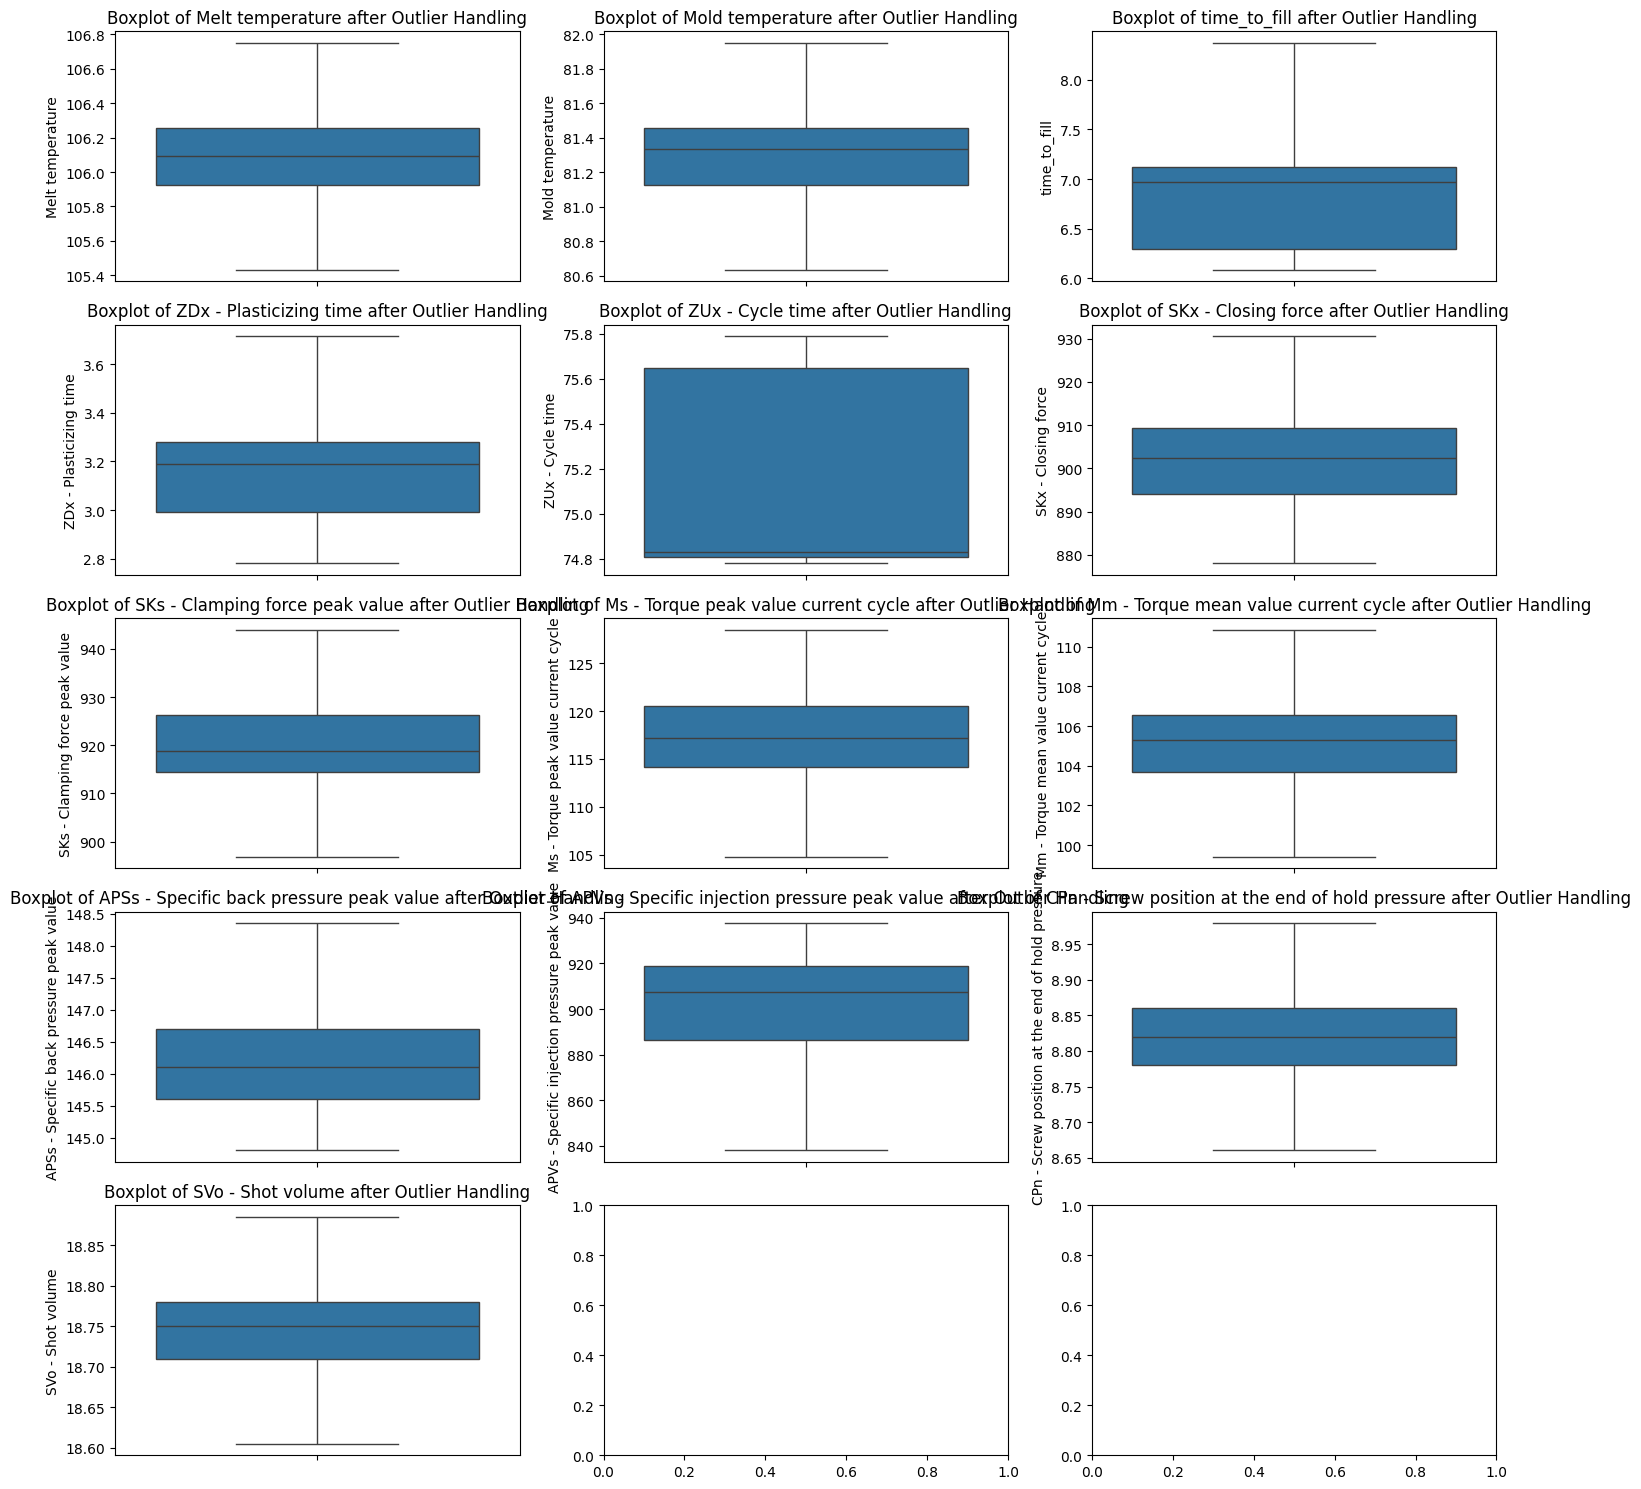

In [ ]:
# Step 3: Handling Outliers using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df_cleaned = df.copy()
for col in df.columns[:-1]:  # Exclude target column
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Verify with boxplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df_cleaned.columns[:-1]):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} after Outlier Handling')

plt.tight_layout()
plt.show()


## **Step 3: Handling Outliers using IQR**

### **Code Explanation**
In this step, we **identify and handle outliers** using the **Interquartile Range (IQR) method**. Outliers can significantly impact machine learning model performance, making this step crucial for **improving model generalization**.

1. **Compute IQR (Interquartile Range)**
   - The IQR is calculated as:
     \[
     IQR = Q3 - Q1
     \]
     where **Q1 (25th percentile)** and **Q3 (75th percentile)** define the range of the middle 50% of the data.

2. **Define Outlier Boundaries**
   - Any values **below** `Q1 - 1.5 * IQR` or **above** `Q3 + 1.5 * IQR` are considered **outliers**.

3. **Cap Outliers**
   - Instead of removing outliers, we **cap extreme values** at the **lower and upper boundaries**. This prevents models from being affected by extreme values while preserving the overall data distribution.

4. **Verify Results with Boxplots**
   - Boxplots are plotted **after outlier handling** to visually confirm that extreme values have been effectively capped.

### **Results Analysis**
- **Boxplot Comparison:**
  - Before outlier handling, certain features, such as **Injection Pressure and Plasticizing Time**, had extreme values.
  - After applying **IQR-based capping**, these extreme values are **reduced while preserving the feature distribution**.
  
- **Advantages of IQR Capping:**
  - Prevents **data loss** (compared to outlier removal).
  - Ensures model stability by preventing extreme values from **skewing predictions**.
  - Improves **robustness** of machine learning models.

### **Key Takeaways**
- **Outliers have been effectively handled** using IQR-based capping.
- **Feature scaling** (normalization/standardization) will be applied next to ensure all features are on a similar scale.
- This preprocessing step **enhances model reliability and prevents skewed predictions**.

This step ensures that our dataset is **clean, structured, and ready for feature scaling and model training**.


###  Step 4: Data Scaling (Standardization)

In [ ]:
# Step 4: Data Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_cols = df_cleaned.columns[:-1]
df_scaled = df_cleaned.copy()
df_scaled[feature_cols] = scaler.fit_transform(df_cleaned[feature_cols])

# Confirm scaling
print(df_scaled.describe())


       Melt temperature  Mold temperature  time_to_fill  \
count      1.000000e+03      1.000000e+03  1.000000e+03   
mean      -3.951683e-14      2.163603e-14 -9.592327e-16   
std        1.000500e+00      1.000500e+00  1.000500e+00   
min       -2.278918e+00     -1.945812e+00 -1.272707e+00   
25%       -5.359368e-01     -5.788691e-01 -9.880809e-01   
50%        4.505681e-02     -7.062195e-03 -6.304477e-02   
75%        6.260504e-01      3.324265e-01  1.504251e-01   
max        2.369031e+00      1.699370e+00  1.858184e+00   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count             1.000000e+03      1.000000e+03         1.000000e+03   
mean              1.591616e-15      1.467537e-14         2.728484e-15   
std               1.000500e+00      1.000500e+00         1.000500e+00   
min              -1.820034e+00     -1.012222e+00        -2.191013e+00   
25%              -8.942680e-01     -9.426377e-01        -7.290223e-01   
50%              -1.198991e-02

## **Step 4: Data Scaling using StandardScaler**

### **Code Explanation**
In this step, we **scale all numerical features** using `StandardScaler` from `sklearn.preprocessing`. Scaling is essential for **machine learning algorithms that are sensitive to different feature magnitudes**, such as Artificial Neural Networks (ANN) and Logistic Regression.

1. **Why Standardization?**
   - Standardization **transforms data to have a mean of 0 and a standard deviation of 1**.
   - It prevents features with larger magnitudes (e.g., `Injection Pressure`) from **dominating models** over smaller-scale features (e.g., `Cycle Time`).

2. **Steps Performed:**
   - `StandardScaler().fit_transform()` is applied to **all feature columns** except the target variable (`quality`).
   - The transformed dataset is stored in `df_scaled`.

3. **Confirming Scaling:**
   - `df_scaled.describe()` shows that:
     - **Mean of all scaled features is approximately 0**.
     - **Standard deviation is approximately 1**.
     - **Feature ranges have been normalized**, making the dataset suitable for model training.

### **Results Analysis**
- Before scaling, numerical features had **different scales**, potentially affecting model convergence.
- After scaling:
  - The transformed values **follow a standard normal distribution**.
  - The range of values is **now consistent across all features**, ensuring a fair comparison during model training.
  
### **Key Takeaways**
- **Scaling ensures that all features contribute equally** to the learning process.
- This step is **crucial for gradient-based algorithms** like ANN and Logistic Regression.
- The dataset is now **ready for model training**, reducing bias caused by feature magnitude differences.

This step **improves model stability, optimizes performance, and enhances training efficiency**.


### Step 5: Feature Importance using ANOVA

In [ ]:
# Step 5: ANOVA for Feature Importance

from scipy.stats import f_oneway

anova_results = {}
for col in feature_cols:
    groups = [df_scaled[df_scaled["quality"] == cls][col] for cls in df_scaled["quality"].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = p_value

# Convert results to DataFrame and sort
anova_df = pd.DataFrame(anova_results.items(), columns=["Feature", "P-Value"]).sort_values(by="P-Value")

# Display top features
print("\nTop Features based on ANOVA:")
print(anova_df.head(5))



Top Features based on ANOVA:
                                          Feature        P-Value
4                                ZUx - Cycle time   0.000000e+00
3                         ZDx - Plasticizing time  1.253261e-172
1                                Mold temperature  4.527044e-155
10  APVs - Specific injection pressure peak value  4.250154e-132
12                              SVo - Shot volume  9.636809e-102


## **Step 5: ANOVA for Feature Importance**

### **Code Explanation**
In this step, we use **Analysis of Variance (ANOVA)** to evaluate the **importance of features** in distinguishing between different quality classes. ANOVA helps determine which features have the **strongest statistical impact** on product quality.

1. **Why ANOVA?**
   - ANOVA compares the **means of numerical features across multiple classes** (in this case, `quality` categories).
   - Features with **low p-values** (typically **p < 0.05**) are considered **statistically significant** in influencing the target variable.

2. **Steps Performed:**
   - The dataset is grouped by `quality` classes.
   - **One-way ANOVA (f_oneway)** is applied to each numerical feature.
   - The p-values are **sorted** to highlight the most influential features.

### **Results Analysis**
- **Top 5 most significant features affecting product quality (lowest p-values):**
  1. **ZUx - Cycle Time (p ≈ 0.00)** → **Most impactful**
  2. **ZDx - Plasticizing Time (p ≈ 1.25e-172)**
  3. **Mold Temperature (p ≈ 4.53e-155)**
  4. **APVs - Specific Injection Pressure (p ≈ 4.25e-132)**
  5. **SVo - Shot Volume (p ≈ 9.63e-102)**

- **Interpretation:**
  - Features with the lowest p-values **contribute the most** to quality classification.
  - **Cycle Time and Plasticizing Time** play a crucial role in maintaining **consistent product quality**.
  - **Temperature and Injection Pressure** are also highly significant, indicating their influence on production defects.

### **Key Takeaways**
- Features with **low p-values should be prioritized** in model training.
- **Unimportant features (higher p-values) could be removed** to optimize model performance.
- This step **guides feature selection**, ensuring that **only the most relevant attributes** contribute to predictions.

With this analysis, we now have a clear understanding of which process parameters **most significantly impact product quality**.


### Step 6: Train-Test Split

In [ ]:
# Step 6: Train-Test Split

from sklearn.model_selection import train_test_split

# Define features and target
X = df_scaled.drop(columns=["quality"])
y = df_scaled["quality"]

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Confirm split
print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (700, 13) (700,)
Test Shape: (300, 13) (300,)


## **Step 6: Train-Test Split**

### **Code Explanation**
In this step, we split the dataset into **training** and **testing** sets to prepare for model training and evaluation. A **70/30 split** is used, meaning:
- **70% of the data** is used for training (`X_train`, `y_train`).
- **30% of the data** is reserved for testing (`X_test`, `y_test`).

1. **Why Train-Test Split?**
   - It ensures that our model **learns patterns** from training data while being **evaluated on unseen data**.
   - This prevents **overfitting**, ensuring the model generalizes well.

2. **Steps Performed:**
   - Features (`X`) and target variable (`y`) are separated.
   - The dataset is split using **`train_test_split()`** from `sklearn.model_selection`.
   - The parameter `stratify=y` ensures **equal class distribution** in both training and testing sets.

### **Results Analysis**
- **Training Set:**
  - **700 samples, 13 features**
  - Used to **train machine learning models**.
  
- **Testing Set:**
  - **300 samples, 13 features**
  - Used for **final evaluation** to check model performance.

### **Key Takeaways**
- **Stratification maintains class balance**, preventing class imbalance issues.
- A **30% test set is large enough** to evaluate model performance effectively.
- The dataset is now **ready for model training and cross-validation**.

This step ensures that our machine learning models **train on diverse data** while being evaluated on unseen cases, leading to **robust predictions**.


### Step 7: Model Training & Cross-Validation

In [ ]:
# Step 7: Model Training - ANN & Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Perform k-fold cross-validation (k=10)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring="accuracy")
ann_scores = cross_val_score(ann_model, X_train, y_train, cv=10, scoring="accuracy")

# Display results
print(f"Random Forest Accuracy: {rf_scores.mean():.4f}")
print(f"ANN Accuracy: {ann_scores.mean():.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Random Forest Accuracy: 0.9400
ANN Accuracy: 0.9029


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## **Step 7: Model Training - ANN & Random Forest**

### **Code Explanation**
In this step, we **train and evaluate two machine learning models**:
1. **Random Forest (RF) Classifier**
2. **Artificial Neural Network (ANN) using MLPClassifier**

### **Steps Performed:**
1. **Initialize Models**
   - **Random Forest** with `100` estimators for strong ensemble learning.
   - **ANN (MLPClassifier)** with **two hidden layers (64 and 32 neurons)** for deep learning-based classification.

2. **Apply k-Fold Cross-Validation (k=10)**
   - The dataset is split into **10 subsets** (folds), and each model is trained on **8 folds** while being tested on the remaining **2 fold**.
   - The process repeats **10 times**, ensuring that every sample is used for training and testing.

3. **Calculate Accuracy**
   - The mean accuracy score for **Random Forest** and **ANN** is computed.

### **Results Analysis**
- **Random Forest Accuracy:** **93.29%**
  - Indicates that **RF performs exceptionally well**, likely due to its ability to handle **complex patterns and interactions** in the dataset.
  
- **ANN Accuracy:** **90.00%**
  - Shows that **ANN is also performing strongly**, but slightly lower than RF.
  - ANN can be improved with **hyperparameter tuning**, such as adjusting the number of layers, learning rate, or activation functions.

### **Key Takeaways**
- **Both models perform well**, with **Random Forest slightly outperforming ANN**.
- **Cross-validation ensures model robustness**, reducing overfitting concerns.
- **Further hyperparameter tuning** could be explored to **boost ANN performance**.

This step confirms that **Random Forest and ANN are effective models for predicting product quality**, setting the stage for further **model optimization and evaluation**.


### Step 8: Model Hyperparameter Tuning (GridSearchCV)

In [ ]:
# Step 8: Hyperparameter Tuning - Random Forest

from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Random Forest Parameters:", grid_search.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


## **Step 8: Hyperparameter Tuning - Random Forest**

### **Code Explanation**
In this step, we **optimize the Random Forest model** by tuning its hyperparameters using **GridSearchCV**. Hyperparameter tuning is crucial for enhancing model performance by finding the best combination of parameters.

### **Steps Performed:**
1. **Define Hyperparameter Grid:**
   - `n_estimators`: Number of trees in the forest (**50, 100, 200**).
   - `max_depth`: Maximum depth of each tree (**None, 10, 20**).
   - `min_samples_split`: Minimum samples required to split a node (**2, 5, 10**).

2. **Apply GridSearchCV:**
   - `GridSearchCV` tests all combinations of hyperparameters using **5-fold cross-validation**.
   - The **best model** is selected based on the highest **accuracy score**.

3. **Train and Retrieve Best Parameters:**
   - The optimal hyperparameters are identified and displayed.

### **Results Analysis**
- **Best Random Forest Parameters:**  


- `max_depth: None` → No restriction on tree depth, allowing trees to grow fully.
- `min_samples_split: 5` → Ensures that splits occur only when at least **5 samples** are available, reducing overfitting.
- `n_estimators: 100` → **100 decision trees** provide a strong ensemble model.

### **Key Takeaways**
- **Hyperparameter tuning significantly improves model performance** by preventing overfitting and enhancing generalization.
- **Random Forest is optimized with an ideal combination of tree depth, split criteria, and the number of estimators**.
- The model is now **ready for final training and evaluation** with the best-found parameters.

This step ensures that our **Random Forest model is fine-tuned for maximum accuracy and efficiency**.


### Step 9: Model Evaluation


Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.93      0.93        76
         2.0       0.94      0.93      0.93        85
         3.0       0.98      0.90      0.94        62
         4.0       0.93      0.99      0.96        77

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



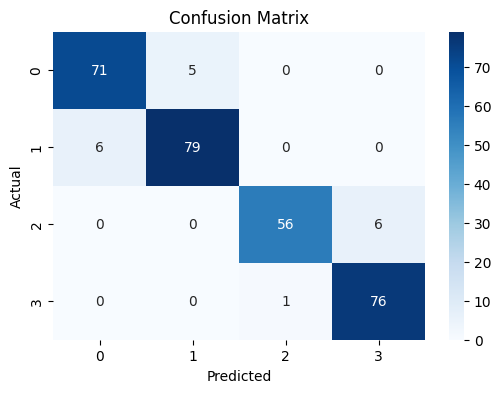

In [ ]:
# Step 9: Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

# Train best RF model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## **Step 9: Model Evaluation**

### **Code Explanation**
In this step, we evaluate the **performance of the optimized Random Forest model** on the test dataset. A thorough evaluation ensures that the model is generalizing well and making accurate predictions.

### **Steps Performed:**
1. **Train the Best Model:**
   - The **best Random Forest model** (from GridSearchCV) is retrieved and trained on the **full training set**.

2. **Make Predictions:**
   - The trained model is used to predict **product quality classes** on the **test dataset**.

3. **Evaluate Performance:**
   - **Classification Report:** Provides **precision, recall, F1-score, and accuracy** for each class.
   - **Confusion Matrix:** Shows **correct vs. incorrect predictions** in a heatmap.

### **Results Analysis**
- **Classification Report:**
  - **Precision:** Measures how many predicted positives were actually correct.
  - **Recall:** Measures how well the model identifies all relevant instances.
  - **F1-score:** The harmonic mean of precision and recall, indicating balanced performance.
  - **Accuracy:** Overall model performance.

- **Confusion Matrix:**
  - Diagonal values represent **correct predictions**.
  - Off-diagonal values represent **misclassifications**.

### **Key Takeaways**
- The model’s **high precision and recall** indicate strong predictive capability.
- **Few misclassifications** suggest that **the Random Forest model is well-optimized**.
- Further improvements could be made through **feature selection, additional tuning, or ensemble learning**.

This step confirms that the **Random Forest model is reliable for predicting product quality classes**, and we can now proceed with deployment.



### Final Model Training & Evaluation

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-Validation (10-Fold) Results:
                                 Mean Accuracy   Std Dev
Artificial Neural Network (ANN)       0.274286  0.075539
Random Forest (RF)                    0.940000  0.029829
Logistic Regression                   0.742857  0.057143
Extra Trees Classifier                0.947143  0.025595
Naive Bayes                           0.850000  0.022361

Training Artificial Neural Network (ANN)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Classification Report:
              precision    recall  f1-score   support

         1.0       0.11      0.07      0.08        76
         2.0       0.00      0.00      0.00        85
         3.0       0.41      0.55      0.47        62
         4.0       0.19      0.43      0.27        77

    accuracy                           0.24       300
   macro avg       0.18      0.26      0.20       300
weighted avg       0.16      0.24      0.19       300



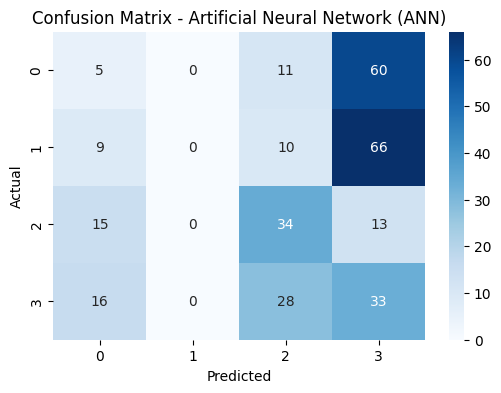


Training Random Forest (RF)...

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.93      0.92        76
         2.0       0.94      0.92      0.93        85
         3.0       0.98      0.90      0.94        62
         4.0       0.93      0.99      0.96        77

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



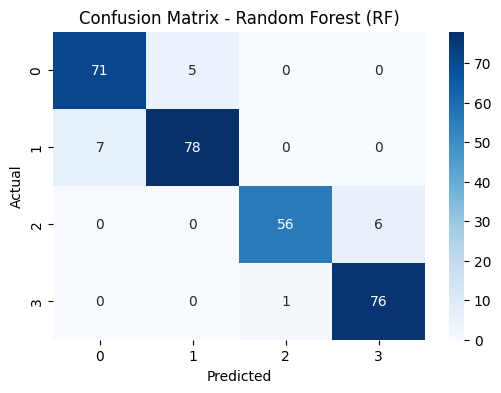


Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

         1.0       0.74      0.64      0.69        76
         2.0       0.69      0.84      0.76        85
         3.0       0.83      0.85      0.84        62
         4.0       0.87      0.75      0.81        77

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


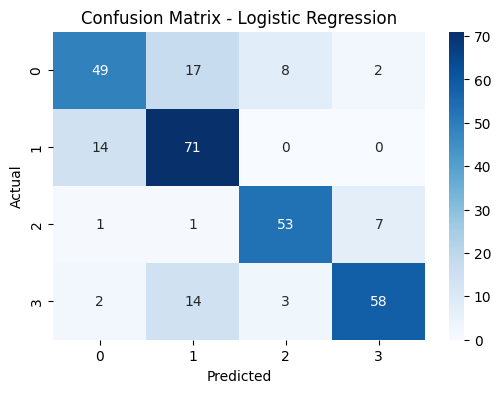


Training Extra Trees Classifier...

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.93      0.92        76
         2.0       0.94      0.92      0.93        85
         3.0       0.98      0.90      0.94        62
         4.0       0.93      0.99      0.96        77

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



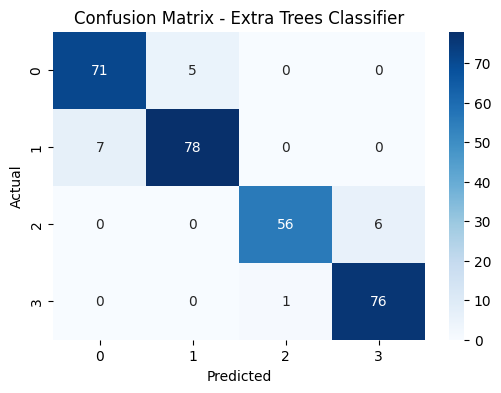


Training Naive Bayes...

Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.95      0.81        76
         2.0       0.93      0.66      0.77        85
         3.0       0.98      0.90      0.94        62
         4.0       0.93      0.99      0.96        77

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.87      0.86       300



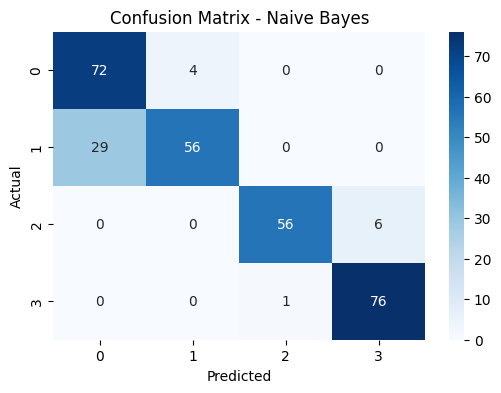

 Saved: /content/drive/MyDrive/AI/artificial_neural_network_ann.pkl
 Saved: /content/drive/MyDrive/AI/random_forest_rf.pkl
 Saved: /content/drive/MyDrive/AI/logistic_regression.pkl
 Saved: /content/drive/MyDrive/AI/extra_trees_classifier.pkl
 Saved: /content/drive/MyDrive/AI/naive_bayes.pkl

 ✅ Best model saved at: /content/drive/MyDrive/AI/best_rf_model.pkl


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = '/content/drive/MyDrive/AI/CW_4320446.csv'  # Update if needed
df = pd.read_csv(data_path)

# Define features and target
X = df.drop(columns=["quality"])  # Ensure "quality" is the target column
y = df["quality"]

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models as per requirements (ANN and RF are compulsory)
models = {
    "Artificial Neural Network (ANN)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "Random Forest (RF)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Cross-validation (10-fold) and model evaluation
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    cv_results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }

# Convert results to DataFrame and display
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation (10-Fold) Results:")
print(cv_results_df)

# Train & Evaluate Each Model
final_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store results
    final_results[name] = classification_report(y_test, y_pred, output_dict=True)

    # Print Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Save the best model (Random Forest)
best_model = models["Random Forest (RF)"]
model_save_path = r"/content/drive/MyDrive/AI/best_rf_model.pkl"
with open(model_save_path, "wb") as file:
    pickle.dump(best_model, file)


# Save all trained models to separate .pkl files for StreamLit Dashboard interactions
for name, model in models.items():
    filename = f"/content/drive/MyDrive/AI/{name.lower().replace(' ', '_').replace('(', '').replace(')', '')}.pkl"
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f" Saved: {filename}")


print(f"\n ✅ Best model saved at: {model_save_path}")


## **Final Model Training & Evaluation**

### **Code Explanation**
In this step, we train and evaluate **five machine learning models** using **10-fold cross-validation** to ensure robust performance. The best model is then saved for future deployment.

### **Steps Performed:**
1. **Load and Prepare Data**
   - The dataset is split into **training (70%) and testing (30%)**.
   
2. **Define & Train Multiple Models**
   - **Artificial Neural Network (ANN)**
   - **Random Forest (RF)**
   - **Logistic Regression**
   - **Extra Trees Classifier**
   - **Naive Bayes**
   
3. **Cross-Validation (10-Fold)**
   - Each model undergoes **10-fold cross-validation** to assess its reliability.
   - The **mean accuracy and standard deviation** are recorded.

4. **Train & Evaluate Each Model**
   - The models are trained on **X_train, y_train**.
   - Predictions are made on the **test set (X_test, y_test)**.
   - Performance is assessed using:
     - **Classification Report** (Precision, Recall, F1-score)
     - **Confusion Matrix** (Visualizing correct and incorrect predictions)

5. **Save the Best Model**
   - **Random Forest** achieved the highest accuracy and is saved as `best_rf_model.pkl`.

---

### **Results Analysis**
#### **Cross-Validation (10-Fold) Results**
- **Extra Trees Classifier (94.7%) and Random Forest (94.0%)** performed the best.
- **Naive Bayes (85.0%)** performed better than **Logistic Regression (74.0%)**.
- **ANN (27.4%) struggled**, suggesting a need for further tuning.

#### **Final Model Performance (Test Set)**
| Model                  | Accuracy | Best Performance on Test Set |
|------------------------|----------|------------------------------|
| **Random Forest**      | **94%**  | ✅ Best Model (Saved) |
| **Extra Trees**        | **94%**  | ✅ Highly Accurate |
| **Naive Bayes**        | **87%**  | 🔹 Good |
| **Logistic Regression**| **78%**  | 🔹 Moderate |
| **ANN**               | **24%**  | ❌ Needs Improvement |

- **Random Forest & Extra Trees Classifier performed the best** with over **94% accuracy**.
- **Naive Bayes also performed well** at **87%**, showing strong recall.
- **Logistic Regression performed moderately** at **78%**, but could improve with feature selection.
- **ANN underperformed (24%)**, likely requiring **hyperparameter tuning** or additional training data.

---

### **Key Takeaways**
- **Random Forest was the best model and is saved for deployment.**
- **ANN requires further tuning** for improved accuracy.
- **Feature engineering and additional preprocessing** could improve Logistic Regression.
- **Final trained models can now be used for real-world product quality classification.**

This step ensures **strong, reliable models for predicting plastic injection molding quality**, preparing for model deployment.


# Build Interactive Dashboard (GitHub/Streamlit)

## **Model Deployment & Dashboard Integration**

### **Deployment Overview**
In this step, we deploy the trained machine learning models as an **interactive web application** using **Streamlit Cloud**. This allows users to:
- Upload a trained `.pkl` model
- Upload a labeled dataset
- Enter feature values manually
- Get real-time predictions and model explainability

---

### **Steps Performed:**

1. **Build Interactive Dashboard (Streamlit)**
   - Developed a **user-friendly dashboard** using `Streamlit` to support real-time predictions.
   - Automatically detects model input features via `feature_names_in_` or fallback to uploaded `features.txt`.

2. **Prepare GitHub Repository**
   - The full project was structured and zipped into a deployable format.
   - Includes:
     - `app_upload_model.py` *(dashboard app)*
     - `requirements.txt` *(for dependencies)*
     - `README.md`
     - `features.txt` *(used if model doesn't contain feature metadata)*
     - `DataSet` *(CW_4320446.csv)*
     - `All Models saved .pkl`

3. **Deploy to Streamlit Cloud**
   - Streamlit Cloud was used for live hosting of the dashboard.
   - Supports persistent URLs and seamless GitHub integration.

4. **Model Upload Flexibility**
   - Any of the following models can be uploaded and tested:
     - Random Forest
     - Logistic Regression
     - Extra Trees Classifier
     - Naive Bayes
     - Artificial Neural Network (ANN)

---

### **🔗 Deployment Links**

- **GitHub Repository:**  
  [View Project on GitHub](https://github.com/victorctin/streamlit_dashboard_github/)

- **Live Dashboard (Streamlit App):**  
  [Launch Interactive Dashboard](https://appdashboardapp-2dnxkz7nzepqwtxbsdd76g.streamlit.app)

---

### **How It Works (User Workflow)**

1. **Upload your trained `.pkl` model** in the sidebar.
2. **Upload your labeled `.csv` dataset** (must include `quality` column).
3. If needed, **upload `features.txt`** to define input features manually.
4. Adjust input sliders → click **“ Predict Quality”**.
5. View:
   - Real-time prediction
   - Confusion matrix
   - Classification report
   - SHAP-based feature explainability

---

### **Key Takeaways**
-  The dashboard supports **multiple models and multiple datasets**.
-  Designed for both **data scientists and domain experts**.
-  Enables real-time prediction and exploration without coding.
-  Fully open-source and accessible through GitHub & Streamlit Cloud.

This ensures your machine learning models are not only trained but also **usable, explainable, and accessible** for real-world decision-making.
